# **TASK 5**
Analyze traffic accident data to identify patters realated to road conditions, weather and time of day. Visualize accident hotspots and contributing factors.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/US_Accidents_March23.csv")


<ipython-input-2-08d6dcdd9eeb>:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/US_Accidents_March23.csv")


In [3]:
df


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42051,A-42052,Source2,2,2016-06-12 11:11:01,2016-06-12 12:41:01,38.226337,-121.423782,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
42052,A-42053,Source2,2,2016-06-12 11:12:08,2016-06-12 12:42:08,37.970158,-121.403168,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
42053,A-42054,Source2,2,2016-06-12 10:07:37,2016-06-12 13:03:00,38.064247,-122.805115,NaN,NaN,0.00,...,False,False,True,False,False,False,Day,Day,Day,Day
42054,A-42055,Source2,2,2016-06-12 10:07:37,2016-06-12 13:00:00,37.704838,-122.116905,NaN,NaN,0.00,...,False,False,True,False,False,False,Day,Day,Day,Day


In [4]:
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
len(df.columns)

46

In [6]:
len(df)

42056

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42056 entries, 0 to 42055
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     42056 non-null  object 
 1   Source                 42056 non-null  object 
 2   Severity               42056 non-null  int64  
 3   Start_Time             42056 non-null  object 
 4   End_Time               42056 non-null  object 
 5   Start_Lat              42056 non-null  float64
 6   Start_Lng              42056 non-null  float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           42056 non-null  float64
 10  Description            42056 non-null  object 
 11  Street                 42055 non-null  object 
 12  City                   42055 non-null  object 
 13  County                 42055 non-null  object 
 14  State                  42055 non-null  object 
 15  Zi

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,42056.000000,42056.000000,42056.000000,0.0,0.0,42056.000000,41727.000000,2297.000000,41544.000000,41880.000000,41682.000000,34948.000000,3063.000000
mean,2.379304,37.985847,-121.190105,NaN,NaN,0.017429,63.120004,35.562560,62.278885,29.993688,9.382225,8.836388,0.028345
std,0.488687,0.604640,5.021392,NaN,NaN,0.386375,13.114563,9.017976,22.223655,0.195216,2.039377,4.619844,0.051736
min,1.000000,36.352592,-123.813927,NaN,NaN,0.000000,3.900000,-8.400000,4.000000,3.010000,0.100000,1.200000,0.000000
25%,2.000000,37.579227,-122.198219,NaN,NaN,0.000000,55.000000,32.800000,46.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,37.881908,-121.922829,NaN,NaN,0.010000,62.100000,38.100000,64.000000,29.990000,10.000000,8.100000,0.010000
75%,3.000000,38.496098,-121.424889,NaN,NaN,0.010000,71.100000,41.500000,80.000000,30.090000,10.000000,11.500000,0.030000
max,4.000000,41.428753,-81.550728,NaN,NaN,51.130000,106.000000,66.000000,100.000000,33.040000,80.000000,142.700000,0.550000


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [10]:
df.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,42056
End_Lng,42056
Distance(mi),0


In [11]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage

,0
End_Lat,100.000000
End_Lng,100.000000
Wind_Chill(F),94.538235
Precipitation(in),92.716854
Wind_Speed(mph),16.901274
Humidity(%),1.217424
Weather_Condition,1.091402
Visibility(mi),0.889290
Temperature(F),0.782290
Pressure(in),0.418490


In [12]:
missing_percentage[missing_percentage !=0]

,0
End_Lat,100.000000
End_Lng,100.000000
Wind_Chill(F),94.538235
Precipitation(in),92.716854
Wind_Speed(mph),16.901274
Humidity(%),1.217424
Weather_Condition,1.091402
Visibility(mi),0.889290
Temperature(F),0.782290
Pressure(in),0.418490


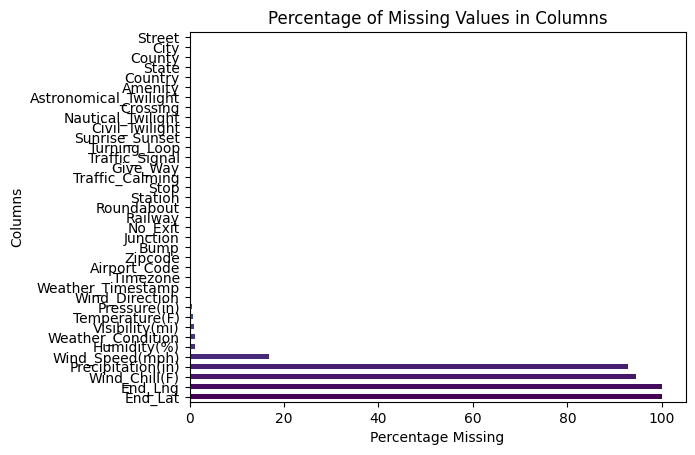

In [13]:
colors = plt.cm.viridis(np.linspace(0, 1, len(missing_percentage[missing_percentage != 0])))

missing_percentage[missing_percentage != 0].plot(kind="barh", color=colors)
plt.xlabel('Percentage Missing')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Columns')
plt.show()

# **Exploratory Analysis and Data Visualization**

Columns we'll Analyze

City

Start Time

Start Lng, Start Lat

Temperature

Weather Condition


In [14]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [15]:
cities = df.City.unique()
len(cities)

460

In [16]:
cities_by_accident = df.City.value_counts()
cities_by_accident

,count
City,
Sacramento,5144
San Jose,2943
Oakland,1765
San Francisco,1266
Hayward,911
...,...
Tiro,1
Strongsville,1
Circleville,1


In [17]:
cities_by_accident[:20]

,count
City,
Sacramento,5144
San Jose,2943
Oakland,1765
San Francisco,1266
Hayward,911
Stockton,866
Fremont,761
Tracy,738
Santa Rosa,728


In [18]:
"New York" in df.City

False

<Axes: ylabel='City'>

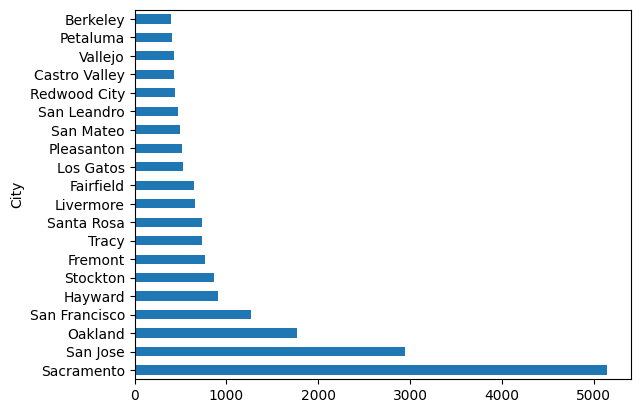

In [19]:
cities_by_accident[:20].plot(kind="barh")

In [20]:
import seaborn as sns
sns.set_style("darkgrid")

In [21]:
highest_cities_accident= cities_by_accident[cities_by_accident >=1000]
len(highest_cities_accident)

4

<ipython-input-22-7474f6ebaf20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(highest_cities_accident)


<Axes: xlabel='count', ylabel='Density'>

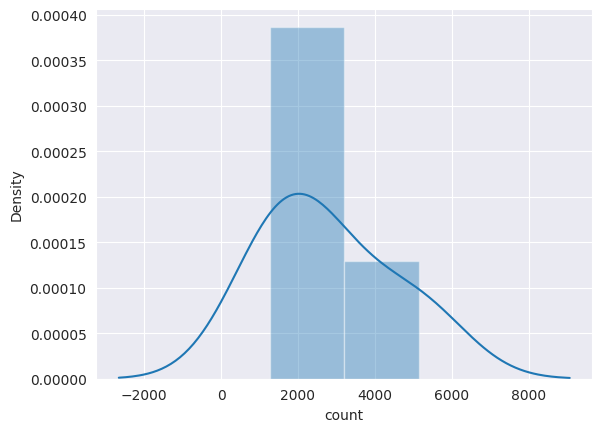

In [22]:
sns.distplot(highest_cities_accident)

In [23]:
len(highest_cities_accident) / len(cities)

0.008695652173913044

In [24]:
lowest_cities_accident= cities_by_accident[cities_by_accident <1000]
len(lowest_cities_accident)

455

<ipython-input-25-9e4e16d19c73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lowest_cities_accident)


<Axes: xlabel='count', ylabel='Density'>

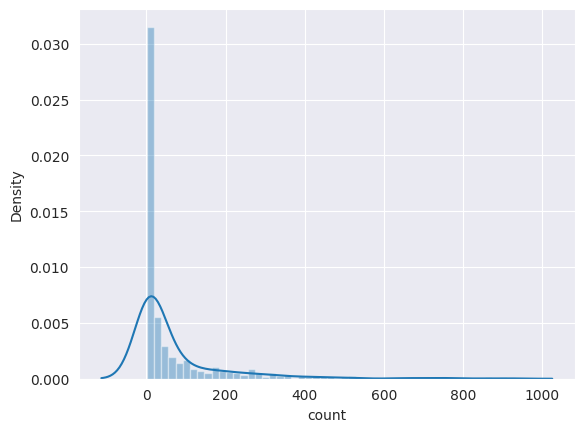

In [25]:
sns.distplot(lowest_cities_accident)

In [26]:
len(lowest_cities_accident) / len(cities)

0.9891304347826086

<Axes: xlabel='count', ylabel='Count'>

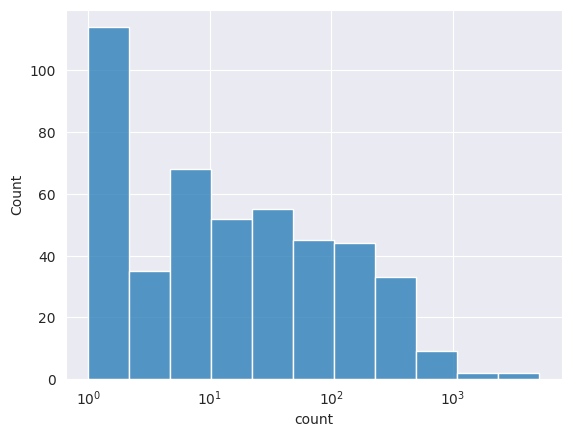

In [27]:
sns.histplot(cities_by_accident , log_scale=True)

In [28]:
cities_by_accident[cities_by_accident ==1]

,count
City,
Stonyford,1
Cobb,1
Grizzly Flats,1
El Macero,1
Guinda,1
...,...
Tiro,1
Strongsville,1
Circleville,1


In [29]:
df.Start_Time


,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
42051,2016-06-12 11:11:01
42052,2016-06-12 11:12:08
42053,2016-06-12 10:07:37
42054,2016-06-12 10:07:37


In [30]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [31]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

<ipython-input-32-daada4f5927c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)


<Axes: xlabel='Start_Time'>

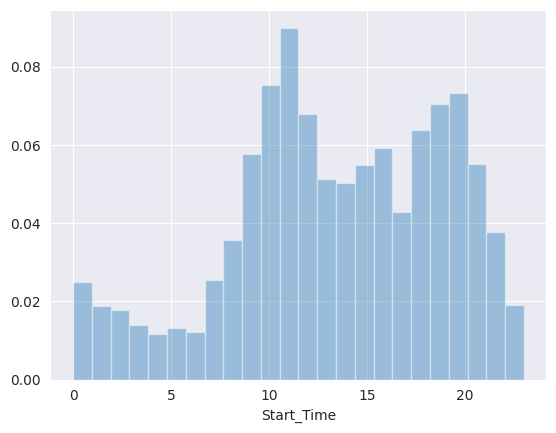

In [32]:
sns.distplot(df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)

<ipython-input-33-019c7ea578c3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

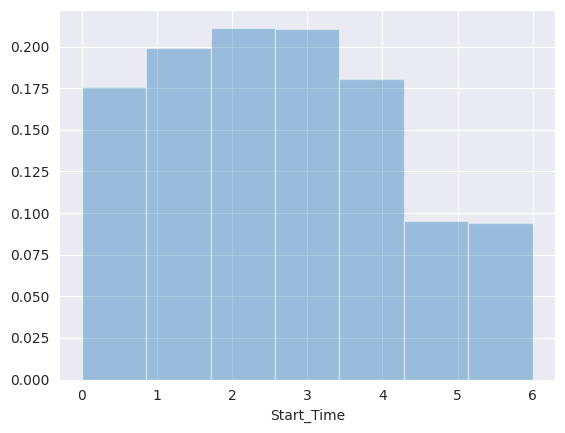

In [33]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

<ipython-input-34-6d10f1b09e8f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

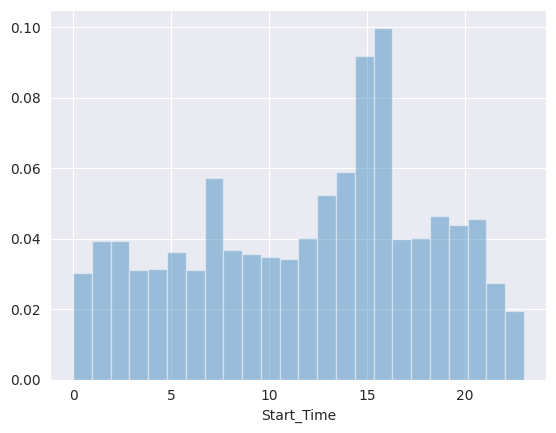

In [34]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<ipython-input-35-a0c386feb2b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

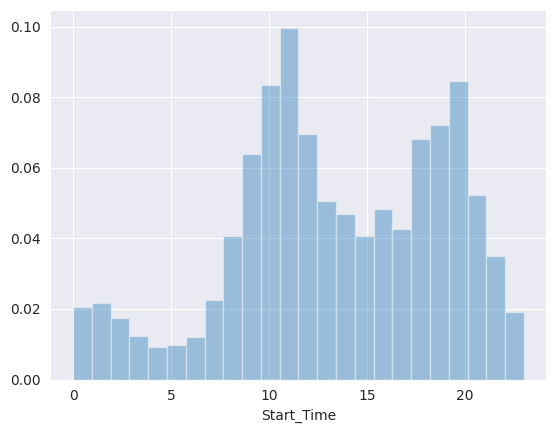

In [35]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<Axes: ylabel='count'>

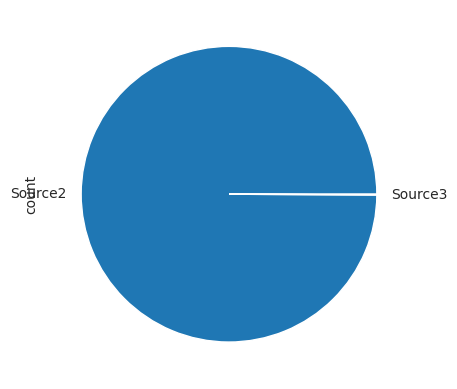

In [36]:
df.Source.value_counts().plot(kind='pie')

In [37]:
df.Start_Lat

,Start_Lat
0,39.865147
1,39.928059
2,39.063148
3,39.747753
4,39.627781
...,...
42051,38.226337
42052,37.970158
42053,38.064247
42054,37.704838


In [38]:
df.Start_Lng

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354
...,...
42051,-121.423782
42052,-121.403168
42053,-122.805115
42054,-122.116905


In [39]:
sample_df = df.sample(int(0.1 *len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

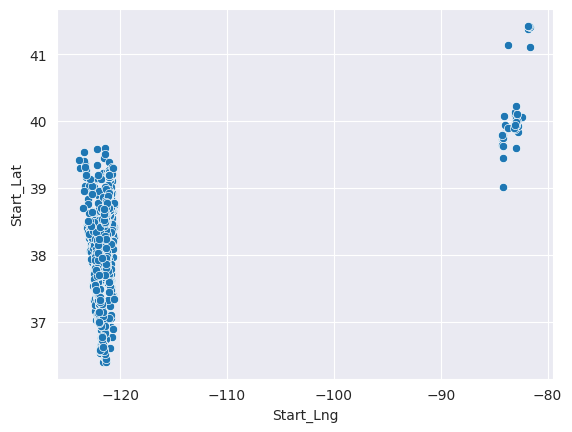

In [40]:
sns.scatterplot(x=sample_df.Start_Lng,y= sample_df.Start_Lat)

In [41]:
!pip install folium
import folium

In [42]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [43]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

942      37.779552
8250     37.324497
18339    37.623623
28036    38.203979
3050     37.565029
           ...    
8938     38.498535
16663    37.900940
8848     38.604973
9009     37.164703
4052     38.283947
Name: Start_Lat, Length: 100, dtype: float64
942     -121.314514
8250    -121.889534
18339   -122.427803
28036   -122.155060
3050    -121.901848
            ...    
8938    -120.693977
16663   -122.310699
8848    -121.401489
9009    -121.704407
4052    -122.450592
Name: Start_Lng, Length: 100, dtype: float64


In [44]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [45]:
from folium.plugins import HeatMap

In [46]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [47]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map